### Common Data Problems:

- Column Names
- Missing Data
- Duplicate Rows
- Outliers
- Untidy
- Process Columns
- Unexpected Column Types

Some most basic operations:

- df.head()
- df.tail()
- df.columns -> Attribute; Check for column name inconsistencies here (like space after column names or whatever)
- df.shape -> Attribute
- df.info() -> Check for column missing values and column data types
  - an Object type is generic type that is stored as a string


#### Exploratory data analysis

- Frequency Counts:
        
        df['column'].value_counts(dropna = False)
    
  - if dropna parameter is not set, by default missing values will not be counted
  - By default, the function prints values in descending order
  
- Summary Statistics 
  - Numeric columns
  - Spot outliers
        
        df.describe()

### Visual exploratory data analysis

- Great way to look at outliers and patterns
- Bar Plots and Histograms
- Histograms
        
        df['column'].plot('hist')

- Boxplots

        df.boxplot(column='', by='')
        
- Scatter Plots
    - Relationship between variables otherwise not visible by the above graphs

In [ ]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)
# rot only rotates the x and y axis labels
# and logx and logy convert the columns to logarithmic scale

# Display the histogram
plt.show()

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#### DataFrame.boxplot() method when multiple columns need to be plotted

In [36]:
x = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
print(x)

          A         B         C         D         E
0  0.095252  0.568313  0.436965  0.247243  0.506010
1  0.463498  0.692937  0.380023  0.197737  0.006338
2  0.510359  0.120789  0.428489  0.709568  0.977321
3  0.901247  0.996205  0.737409  0.831523  0.951925
4  0.993779  0.263293  0.537265  0.119904  0.930143
5  0.993950  0.690421  0.406332  0.507280  0.637605
6  0.122289  0.528935  0.493082  0.055583  0.078434
7  0.866466  0.387721  0.566153  0.143122  0.250562
8  0.959894  0.076157  0.917379  0.235716  0.597014
9  0.905128  0.147461  0.696203  0.499026  0.116624


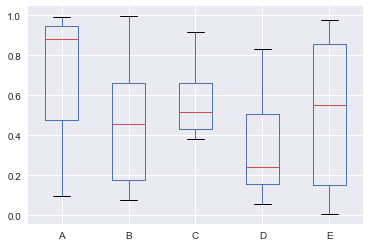

In [55]:
x.boxplot()
plt.show()

#### DataFrame.boxplot() method when one column needs to be plotted grouped by another column

In [50]:
lst = 'A'*5 + 'B'*10 + 'C'*15
lst_val = [x for x in lst]
dt = {
    'label': lst_val,
    'values': np.random.rand(30)
}
df = pd.DataFrame(dt)
print(df.head(10))

  label    values
0     A  0.994277
1     A  0.822585
2     A  0.789215
3     A  0.660328
4     A  0.385569
5     B  0.456407
6     B  0.371966
7     B  0.797468
8     B  0.171473
9     B  0.892071


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


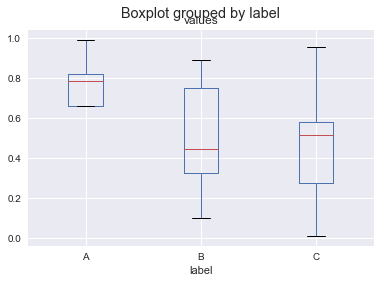

In [70]:
df.boxplot(column='values', by='label')
plt.show()

### Tidy data

- Tidy Data paper by Hadley Wickham 
- Standard Approach to organize values in a dataset
- Principles of Tidy Data
  - Columns represent separate variables
  - Rows represent separate observations
  - Observations Units form tables
  
- Melt Data (pd.melt() is a function)
- Pivot data (df.melt() is a method)

#### Melting Data (analysis friendly shape)

- pd.melt()
- Melting data is the process of turning columns of your data into rows of data.
- There are two parameters you should be aware of: **id_vars** and **value_vars**. The **id_vars** represent the columns of the data you do not want to melt (i.e., keep it in its current shape), while the value_vars represent the columns you do wish to melt into rows. By default, if no **value_vars** are provided, all columns not set in the **id_vars** will be melted. This could save a bit of typing, depending on the number of columns that need to be melted.

In [72]:
dt = {
    'Ozone': [41, 36,12,18,28,30],
    'Solar.R': [190, 118, 149, 313, 676, 198],
    'Wind': [7.4, 8.0, 12.6, 11.5, 14.3, 14.9],
    'Temp': [67, 72, 74, 62, 56, 66],
    'Month': [5, 5, 5, 5, 5, 5],
    'Day': [1, 2, 3, 4, 5, 6],
}
airquality = pd.DataFrame(dt)
airquality

,Day,Month,Ozone,Solar.R,Temp,Wind
0,1,5,41,190,67,7.4
1,2,5,36,118,72,8.0
2,3,5,12,149,74,12.6
3,4,5,18,313,62,11.5
4,5,5,28,676,56,14.3
5,6,5,30,198,66,14.9


In [74]:
# Use pd.melt() to melt the Ozone, Solar.R, Wind, and Temp columns of airquality into rows. 
# Do this by using id_vars to specify the columns you do not wish to melt: 'Month' and 'Day'.

airquality_melt = pd.melt(frame=airquality, id_vars=['Month', 'Day']) # Note by not specifying value_vars, I mean melt all the rest not in id_vars
airquality_melt

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,28.0
5,5,6,Ozone,30.0
6,5,1,Solar.R,190.0
7,5,2,Solar.R,118.0
8,5,3,Solar.R,149.0
9,5,4,Solar.R,313.0


You can rename the **variable** column by specifying an argument to the **var_name** parameter, and the **value** column by specifying an argument to the **value_name** parameter.

In [75]:
# Melt the Ozone, Solar.R, Wind, and Temp columns of airquality into rows, with the default variable column 
# renamed to 'measurement' and the default value column renamed to 'reading'. 

airquality_melt_new = pd.melt(frame=airquality, id_vars=['Month', 'Day'], var_name='measurement', value_name='reading')
airquality_melt_new

,Month,Day,measurement,reading
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,28.0
5,5,6,Ozone,30.0
6,5,1,Solar.R,190.0
7,5,2,Solar.R,118.0
8,5,3,Solar.R,149.0
9,5,4,Solar.R,313.0


#### Pivoting data (opposite of Melting Data ie. transforming rows to columns) (report friendly shape)

- While melting takes a set of columns and turns it into a single column, pivoting will create a new column for each unique value in a specified column.
- Pivot will throw an error when there are duplicate entries that can't be pivoted
- In such cases, you can use the Pivot Table method
  - Pivot Table has a parameter called **aggfunc** that will specify Python how to use these duplicate values

**.pivot_table()** has an **index** parameter which you can use to specify the columns that you don't want pivoted: It is similar to the **id_vars** parameter of **pd.melt()**. Two other parameters that you have to specify are **columns** (the name of the column you want to pivot), and **values** (the values to be used when the column is pivoted). 

In [76]:
# Pivot airquality_melt by using .pivot_table() with the rows indexed by 'Month' and 'Day', 
# the columns indexed by 'measurement', and the values populated with 'reading'.

airquality_pivot = airquality_melt_new.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading')
airquality_pivot

measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5       28.0    676.0  56.0  14.3
      6       30.0    198.0  66.0  14.9

Notice that pivoted table does not look like the original DataFrame. What you got back instead was a pandas DataFrame with a hierarchical index (also known as a MultiIndex). We can fix this by using **reset_index()** method.

In [80]:
print(airquality_pivot.index)

MultiIndex(levels=[[5], [1, 2, 3, 4, 5, 6]],
           labels=[[0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5]],
           names=['Month', 'Day'])


In [81]:
airquality_pivot = airquality_pivot.reset_index()

In [82]:
print(airquality_pivot.index)

RangeIndex(start=0, stop=6, step=1)


In [84]:
print(airquality_pivot)

measurement  Month  Day  Ozone  Solar.R  Temp  Wind
0                5    1   41.0    190.0  67.0   7.4
1                5    2   36.0    118.0  72.0   8.0
2                5    3   12.0    149.0  74.0  12.6
3                5    4   18.0    313.0  62.0  11.5
4                5    5   28.0    676.0  56.0  14.3
5                5    6   30.0    198.0  66.0  14.9


In [86]:
airquality_pivot.index.name = 'Row Indices'
airquality_pivot.columns.name = 'Column Indices'
print(airquality_pivot)

Column Indices  Month  Day  Ozone  Solar.R  Temp  Wind
Row Indices                                           
0                   5    1   41.0    190.0  67.0   7.4
1                   5    2   36.0    118.0  72.0   8.0
2                   5    3   12.0    149.0  74.0  12.6
3                   5    4   18.0    313.0  62.0  11.5
4                   5    5   28.0    676.0  56.0  14.3
5                   5    6   30.0    198.0  66.0  14.9


In [89]:
# Pivoting duplicate values ('Ozone' is duplicated in the following DataFrame)
dt_dup = {
    'Ozone': [41, 36, 12, 12 ,12 ,30],
    'Solar.R': [190, 118, 149, 313, 676, 198],
    'Wind': [7.4, 8.0, 12.6, 11.5, 14.3, 14.9],
    'Temp': [67, 72, 74, 62, 56, 66],
    'Month': [5, 5, 5, 5, 5, 5],
    'Day': [1, 2, 3, 4, 5, 6],
}
airquality_dup = pd.DataFrame(dt_dup)
print(airquality_dup)
# Get the Melted version of this
airquality_dup_melted = pd.melt(frame=airquality_dup, id_vars=['Month', 'Day'], var_name='measurement', value_name='reading')
airquality_dup_melted

   Day  Month  Ozone  Solar.R  Temp  Wind
0    1      5     41      190    67   7.4
1    2      5     36      118    72   8.0
2    3      5     12      149    74  12.6
3    4      5     12      313    62  11.5
4    5      5     12      676    56  14.3
5    6      5     30      198    66  14.9


,Month,Day,measurement,reading
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,12.0
4,5,5,Ozone,12.0
5,5,6,Ozone,30.0
6,5,1,Solar.R,190.0
7,5,2,Solar.R,118.0
8,5,3,Solar.R,149.0
9,5,4,Solar.R,313.0


In [90]:
# Prove that because of repeated values, pivot fails
airquality_dup_melted.pivot(index=['Month', 'Day'], columns='measurement', values='reading')

ValueError: Wrong number of items passed 24, placement implies 2

In [92]:
# Now fix this
airquality_dup_melted.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading', aggfunc=np.mean).reset_index()

measurement,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,12.0,313.0,62.0,11.5
4,5,5,12.0,676.0,56.0,14.3
5,5,6,30.0,198.0,66.0,14.9


The default aggregation function used by **.pivot_table()** is **np.mean()**. So you could have pivoted the duplicate values in this DataFrame even without explicitly specifying the **aggfunc** parameter!

Another common way multiple variables are stored in columns is with a delimiter. Any DataFrame column of type *Object* can be converted to a String by the **str()** method and then any function can be applied to the entire column! (Keep this is mind, very important!)

#### Concatenating data

    pd.concat(df1, df2)

The above will concatenate row wise by default. You can pass **ignore_index=True** to not repeat indices!

In [131]:
dt1 = {
    'A': list(range(0,5)),
    'B': list(range(5,10))
}
dt2 = {
    'A': list(range(10,15)),
    'B': list(range(15,20))
}
df1 = pd.DataFrame(dt1)
df2 = pd.DataFrame(dt2)
print(df1)
print(df2)

   A  B
0  0  5
1  1  6
2  2  7
3  3  8
4  4  9
    A   B
0  10  15
1  11  16
2  12  17
3  13  18
4  14  19


In [132]:
# See that row wise concatenation by default will repeat indices
pd.concat([df1, df2])

,A,B
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9
0,10,15
1,11,16
2,12,17
3,13,18
4,14,19


In [134]:
# Reset indices
pd.concat([df1, df2], ignore_index=True)

,A,B
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9
5,10,15
6,11,16
7,12,17
8,13,18
9,14,19


In [138]:
# Another method of resetting indices
pd.concat([df1, df2]).reset_index(drop=True)
# Note that the drop parameter avoids adding a new *index* column altogether

,A,B
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9
5,10,15
6,11,16
7,12,17
8,13,18
9,14,19


For column wise concatentation, you have to add **axis=1** as a parameter to **pd.concat()**

In [139]:
dt1 = {
    'A': list(range(0,5)),
    'B': list(range(5,10))
}
dt2 = {
    'C': list(range(10,15)),
    'D': list(range(15,20))
}
df1 = pd.DataFrame(dt1)
df2 = pd.DataFrame(dt2)
print(df1)
print(df2)

   A  B
0  0  5
1  1  6
2  2  7
3  3  8
4  4  9
    C   D
0  10  15
1  11  16
2  12  17
3  13  18
4  14  19


In [140]:
# Concat column wise
pd.concat([df1, df2], axis=1)

,A,B,C,D
0,0,5,10,15
1,1,6,11,16
2,2,7,12,17
3,3,8,13,18
4,4,9,14,19


#### Concatenating multiple files

Globbing
- Pattern matching for file names
- Wildcards: * ?
  - Any csv file: *.csv
  - Any single character: file_?.csv
- Returns a list of file names
- Can use this list to load into separate DataFrames

      import glob
      csv_files = glob.glob('*.csv')
      data = []
      for file in csv_files:
          data.append(pd.read_csv(file))
      pd.concat(data)

#### Merge Data

    pd.merge(
        left=df1,
        right=df2,
        on=None (if column names are exactly the same)
        left_on=left table's column name
        right_on=right table's column name
    )
    
You only need to specify the **on** parameter or the **left_on and right_on**

In [143]:
dt1 = {'lat': {0: -49.850000000000001,
  1: -47.149999999999999,
  2: -48.869999999999997},
 'long': {0: -128.56999999999999, 1: -126.72, 2: -123.40000000000001},
 'name': {0: 'DR-1', 1: 'DR-3', 2: 'MSK-4'}}

dt2 = {'dated': {0: '1927-02-08', 1: '1939-01-07', 2: '1932-01-14'},
 'ident': {0: 619, 1: 734, 2: 837},
 'site': {0: 'DR-1', 1: 'DR-3', 2: 'MSK-4'}}

site = pd.DataFrame(dt1, columns=['name', 'lat', 'long'])
visited = pd.DataFrame(dt2, columns=['ident', 'site', 'dated'])

print(site)
print(visited)

    name    lat    long
0   DR-1 -49.85 -128.57
1   DR-3 -47.15 -126.72
2  MSK-4 -48.87 -123.40
   ident   site       dated
0    619   DR-1  1927-02-08
1    734   DR-3  1939-01-07
2    837  MSK-4  1932-01-14


In [144]:
# Merge the site and visited DataFrames on the 'name' column of site and 'site' column of visited
pd.merge(left=site, right=visited, left_on='name', right_on='site')

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
2,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


### Data Types (DataFrame column data types)

- df.dtypes -> shows the data type each and every column of the dataframe
- df['column'].astype(int/float/str/bool/'category' etc.)
- Categorical Data
  - Can make the DataFrame smaller in memory
  - Many other Python libraries understand categorical data
- Converting Numeric columns which are stored as Objects because of missing values etc.
  - pd.to_numeric(df['column'], errors='coerce') # Errors will convert missing values to NaN
